This notebook finds the number of boarddocs for each state, and compare it to number of schools from NCES for each state.

Input
- `../deliverable1/release/deliverable_1.csv`
- `../deliverable2/release/deliverable_2.csv`

In [5]:
import pandas as pd

boarddocs_df = pd.read_csv("../deliverable1/release/deliverable_1.csv")
boarddocs_df.head()

,boarddocs_url,school_district,address,home_website,phone
0,https://go.boarddocs.com/mi/sjs/Board.nsf/Public,St. Joseph Public Schools,NaN,https://www.sjschools.org,NaN
1,https://go.boarddocs.com/pa/cali/Board.nsf/Public,NaN,NaN,http://www.calsd.org,NaN
2,https://go.boarddocs.com/oh/mapleheights/Board...,Maple Heights City Schools,"5740 Lawn Avenue | Maple Heights, OH 44137 | 2...",http://www.mapleschools.com,(216) 587-6100
3,https://go.boarddocs.com/oh/rlsd/Board.nsf/Public,Riverside Local School District,"585 Riverside Drive | Painesville, Ohio 44077 ...",https://www.riversidelocalschools.com,(440) 352-0668
4,https://go.boarddocs.com/pa/shun/Board.nsf/Public,Southern Huntingdon County School District,NaN,http://www.shcsd.org,NaN


In [7]:
nces_df = pd.read_csv("../nces2324.csv")
nces_df.head()

/var/folders/cp/kz443md17ndf52c8_802gy080000gn/T/ipykernel_98131/2474922102.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  nces_df = pd.read_csv("../nces2324.csv")


,SCHOOL_YEAR,FIPST,STATENAME,ST,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,MSTREET1,...,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED,OPERATIONAL_SCHOOLS
0,2023-2024,1,ALABAMA,AL,Alabama Youth Services,1,NaN,AL-210,100002,1000 Industrial School Road,...,Yes,Yes,No,No,No,KG,12,Other,As reported,0
1,2023-2024,1,ALABAMA,AL,Albertville City,1,NaN,AL-101,100005,8379 US Highway 431,...,Yes,Yes,No,No,No,PK,12,Other,As reported,6
2,2023-2024,1,ALABAMA,AL,Marshall County,1,NaN,AL-048,100006,12380 US Highway 431 S,...,Yes,Yes,No,No,No,PK,12,Other,As reported,15
3,2023-2024,1,ALABAMA,AL,Hoover City,1,NaN,AL-158,100007,2810 Metropolitan Way,...,Yes,Yes,No,No,No,PK,12,Other,As reported,18
4,2023-2024,1,ALABAMA,AL,Madison City,1,NaN,AL-169,100008,211 Celtic Dr,...,Yes,Yes,No,No,No,PK,12,Other,As reported,13


In [6]:
merged_df = pd.read_csv("../deliverable2/release/deliverable_2.csv")
merged_df.head()

,LEAID,LEA_NAME,boarddocs_url,school_district_from_boarddocs,address_from_boarddocs
0,2632850.0,St. Joseph Public Schools,https://go.boarddocs.com/mi/sjs/Board.nsf/Public,St. Joseph Public Schools,NaN
1,4204710.0,California Area SD,https://go.boarddocs.com/pa/cali/Board.nsf/Public,NaN,NaN
2,3904430.0,Maple Heights City,https://go.boarddocs.com/oh/mapleheights/Board...,Maple Heights City Schools,"5740 Lawn Avenue | Maple Heights, OH 44137 | 2..."
3,4222320.0,Southern Huntingdon County SD,https://go.boarddocs.com/pa/shun/Board.nsf/Public,Southern Huntingdon County School District,NaN
4,1001680.0,Sussex Technical School District,https://go.boarddocs.com/de/sussexvt/Board.nsf...,Sussex Technical School District,17099 County Seat Hwy | Georgetown DE 19947 | ...


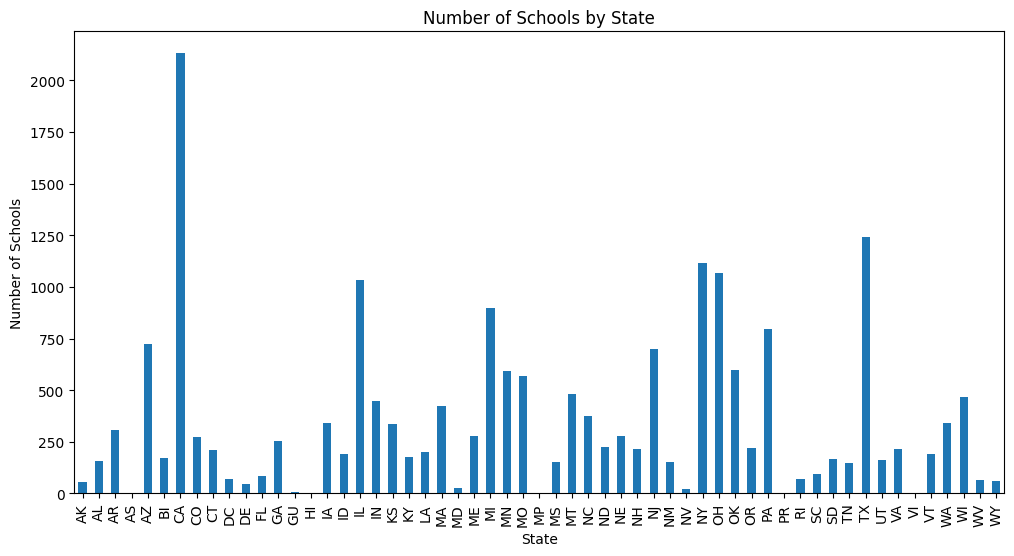

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram for NCES
nces_df['ST'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('State')
plt.ylabel('Number of Schools')
plt.title('Number of Schools by State')
plt.show()


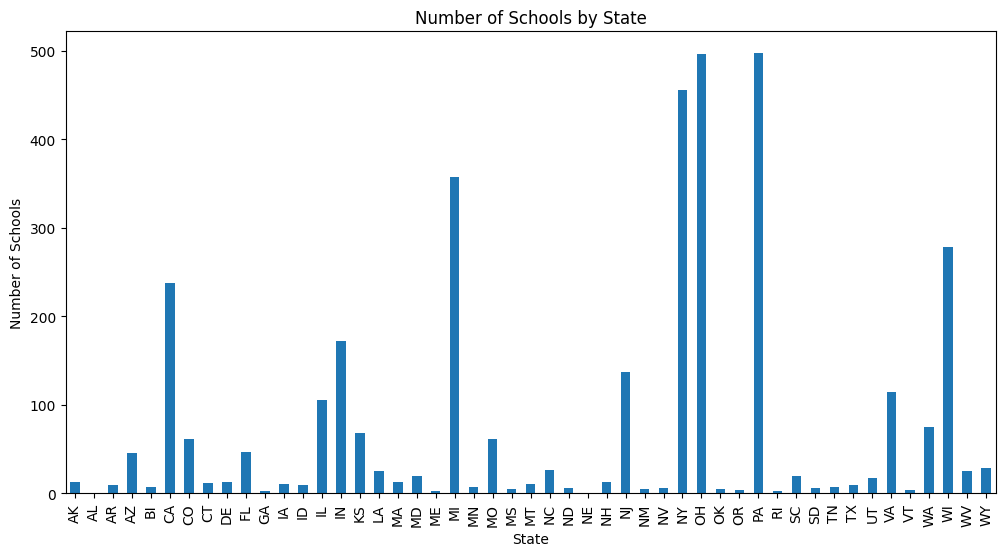

In [10]:
# Plot the histogram for merged
merged_df = pd.merge(merged_df, nces_df[["LEAID","ST"]], on="LEAID")
merged_df['ST'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel('State')
plt.ylabel('Number of Schools')
plt.title('Number of Schools by State')
plt.show()


In [12]:
# add a boolean for nces to show if in boarddocs
nces_df["in_boarddocs"] = nces_df["LEAID"].isin(merged_df["LEAID"])

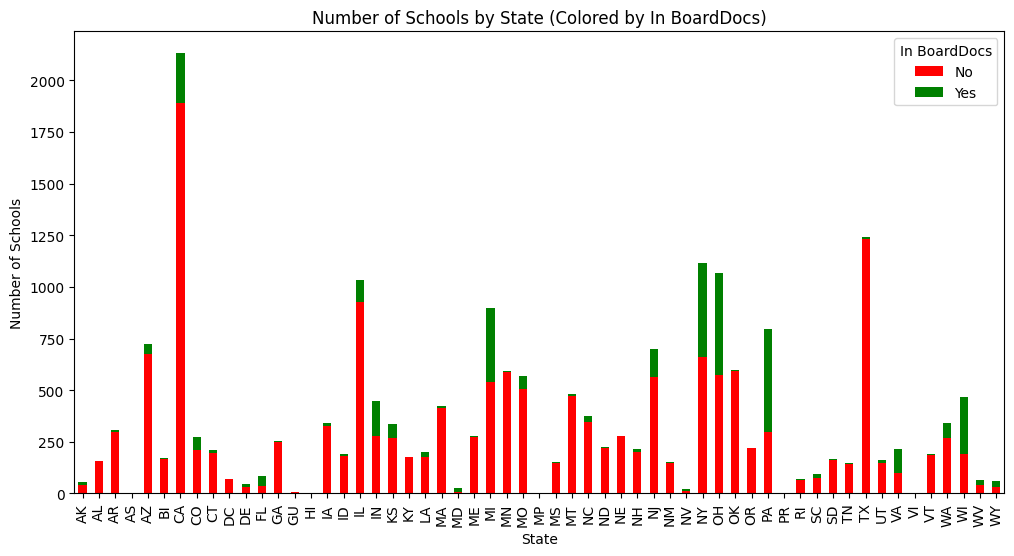

In [13]:
# Create a pivot table to count the number of schools by state and in_boarddocs status
pivot_table = nces_df.pivot_table(index='ST', columns='in_boarddocs', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('State')
plt.ylabel('Number of Schools')
plt.title('Number of Schools by State (Colored by In BoardDocs)')
plt.legend(title='In BoardDocs', labels=['No', 'Yes'])
plt.show()

In [22]:
nces_df.columns

Index(['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'LEA_NAME',
       'STATE_AGENCY_NO', 'UNION', 'ST_LEAID', 'LEAID', 'MSTREET1', 'MSTREET2',
       'MSTREET3', 'MCITY', 'MSTATE', 'MZIP', 'MZIP4', 'LSTREET1', 'LSTREET2',
       'LSTREET3', 'LCITY', 'LSTATE', 'LZIP', 'LZIP4', 'PHONE', 'WEBSITE',
       'SY_STATUS', 'SY_STATUS_TEXT', 'UPDATED_STATUS', 'UPDATED_STATUS_TEXT',
       'EFFECTIVE_DATE', 'LEA_TYPE', 'LEA_TYPE_TEXT', 'OUT_OF_STATE_FLAG',
       'CHARTER_LEA', 'CHARTER_LEA_TEXT', 'NOGRADES', 'G_PK_OFFERED',
       'G_KG_OFFERED', 'G_1_OFFERED', 'G_2_OFFERED', 'G_3_OFFERED',
       'G_4_OFFERED', 'G_5_OFFERED', 'G_6_OFFERED', 'G_7_OFFERED',
       'G_8_OFFERED', 'G_9_OFFERED', 'G_10_OFFERED', 'G_11_OFFERED',
       'G_12_OFFERED', 'G_13_OFFERED', 'G_UG_OFFERED', 'G_AE_OFFERED', 'GSLO',
       'GSHI', 'LEVEL', 'IGOFFERED', 'OPERATIONAL_SCHOOLS', 'in_boarddocs'],
      dtype='object')

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data
X = nces_df[
    [
        "ST",
        "SY_STATUS",
        "SY_STATUS_TEXT",
        "UPDATED_STATUS",
        "UPDATED_STATUS_TEXT",
        "LEA_TYPE",
        "OUT_OF_STATE_FLAG",
        "CHARTER_LEA",
        "GSLO",
        "GSHI",
        "LEVEL",
        "IGOFFERED",
        "OPERATIONAL_SCHOOLS",
    ]
]
y = nces_df["in_boarddocs"]

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame(
    {"Feature": feature_names, "Importance": importances}
)

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Print the feature importances
print("Feature Importances:\n", feature_importances)

Accuracy: 0.8689748811948405
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.92      0.92      4891
        True       0.61      0.62      0.62      1001

    accuracy                           0.87      5892
   macro avg       0.77      0.77      0.77      5892
weighted avg       0.87      0.87      0.87      5892

Feature Importances:
                        Feature    Importance
3          OPERATIONAL_SCHOOLS  2.722263e-01
46                       ST_PA  8.971364e-02
43                       ST_OH  8.395813e-02
42                       ST_NY  6.176303e-02
58                       ST_WI  4.794366e-02
..                         ...           ...
121      LEVEL_Adult Education  1.382670e-07
61        SY_STATUS_TEXT_Added  5.205592e-09
69   UPDATED_STATUS_TEXT_Added  0.000000e+00
7                        ST_AS  0.000000e+00
18                       ST_HI  0.000000e+00

[133 rows x 2 columns]


In [16]:
# check operational schools
nces_df[nces_df["OPERATIONAL_SCHOOLS"]==0].shape

(1231, 59)

In [17]:
nces_df.shape

(19637, 59)

In [21]:
# check if any boarddocs are there
nces_df[nces_df["in_boarddocs"] & (nces_df["OPERATIONAL_SCHOOLS"]==0)].shape

(93, 59)

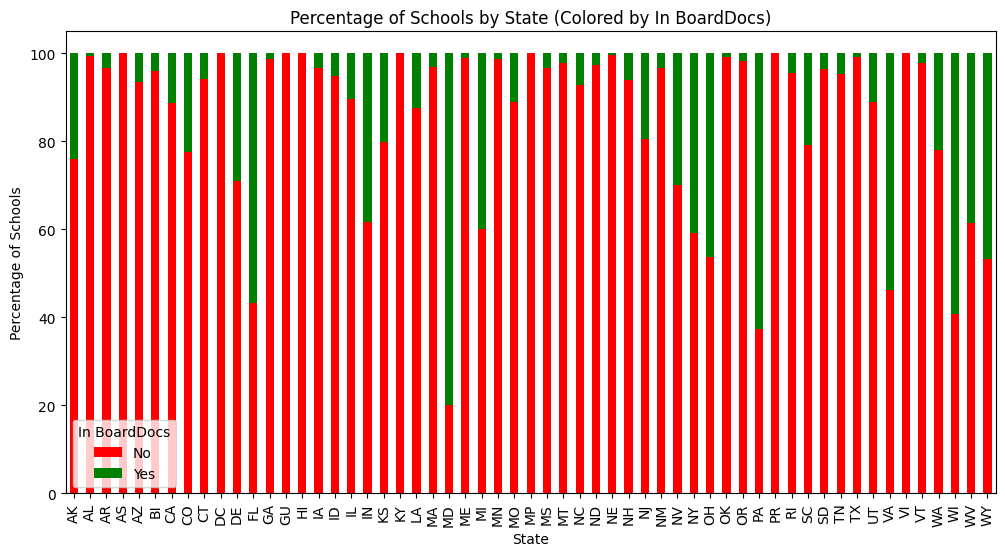

In [24]:
# Create a pivot table to count the number of schools by state and in_boarddocs status
pivot_table = nces_df.pivot_table(index='ST', columns='in_boarddocs', aggfunc='size', fill_value=0)

# Normalize the pivot table to get percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the 100% stacked bar chart
pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.xlabel('State')
plt.ylabel('Percentage of Schools')
plt.title('Percentage of Schools by State (Colored by In BoardDocs)')
plt.legend(title='In BoardDocs', labels=['No', 'Yes'])
plt.show()

In [38]:
nces_df.columns

Index(['SCHOOL_YEAR', 'FIPST', 'STATENAME', 'ST', 'LEA_NAME',
       'STATE_AGENCY_NO', 'UNION', 'ST_LEAID', 'LEAID', 'MSTREET1', 'MSTREET2',
       'MSTREET3', 'MCITY', 'MSTATE', 'MZIP', 'MZIP4', 'LSTREET1', 'LSTREET2',
       'LSTREET3', 'LCITY', 'LSTATE', 'LZIP', 'LZIP4', 'PHONE', 'WEBSITE',
       'SY_STATUS', 'SY_STATUS_TEXT', 'UPDATED_STATUS', 'UPDATED_STATUS_TEXT',
       'EFFECTIVE_DATE', 'LEA_TYPE', 'LEA_TYPE_TEXT', 'OUT_OF_STATE_FLAG',
       'CHARTER_LEA', 'CHARTER_LEA_TEXT', 'NOGRADES', 'G_PK_OFFERED',
       'G_KG_OFFERED', 'G_1_OFFERED', 'G_2_OFFERED', 'G_3_OFFERED',
       'G_4_OFFERED', 'G_5_OFFERED', 'G_6_OFFERED', 'G_7_OFFERED',
       'G_8_OFFERED', 'G_9_OFFERED', 'G_10_OFFERED', 'G_11_OFFERED',
       'G_12_OFFERED', 'G_13_OFFERED', 'G_UG_OFFERED', 'G_AE_OFFERED', 'GSLO',
       'GSHI', 'LEVEL', 'IGOFFERED', 'OPERATIONAL_SCHOOLS', 'in_boarddocs',
       'in_boarddocs_plot'],
      dtype='object')

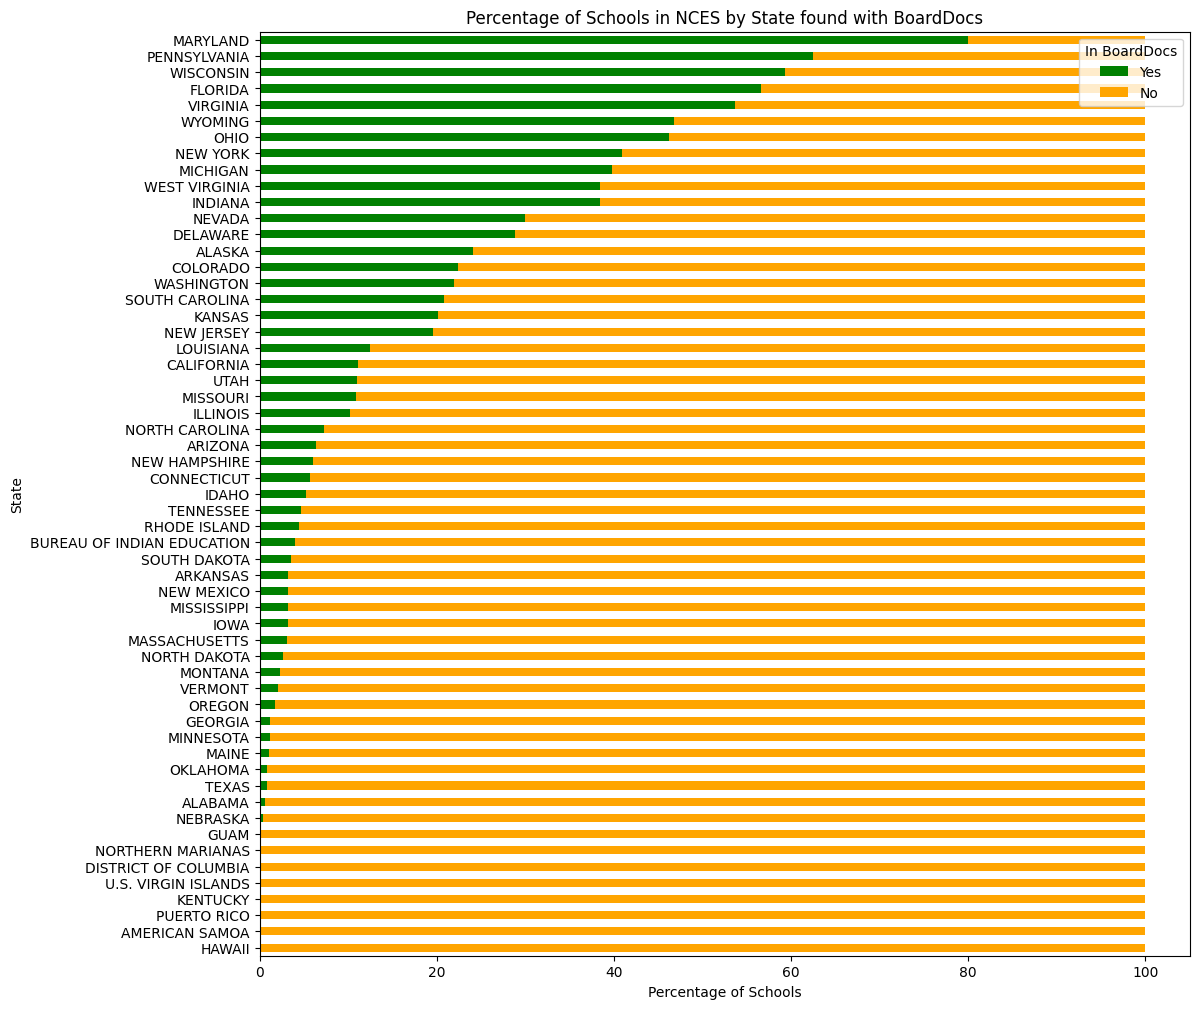

In [44]:
# Create a pivot table to count the number of schools by state and in_boarddocs status
nces_df["in_boarddocs_plot"] = ~nces_df["in_boarddocs"]
pivot_table = nces_df.pivot_table(index='STATENAME', columns='in_boarddocs_plot', aggfunc='size', fill_value=0)

# Normalize the pivot table to get percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Sort the pivot table by the percentage of schools in BoardDocs
pivot_table_percentage = pivot_table_percentage.sort_values(by=True, ascending=False)

# Plot the 100% stacked horizontal bar chart
pivot_table_percentage.plot(kind='barh', stacked=True, figsize=(12, 12), color=['green', 'orange'])
plt.ylabel('State')
plt.xlabel('Percentage of Schools')
plt.title('Percentage of Schools in NCES by State found with BoardDocs')
plt.legend(title='In BoardDocs', labels=['Yes', 'No'])
plt.show()

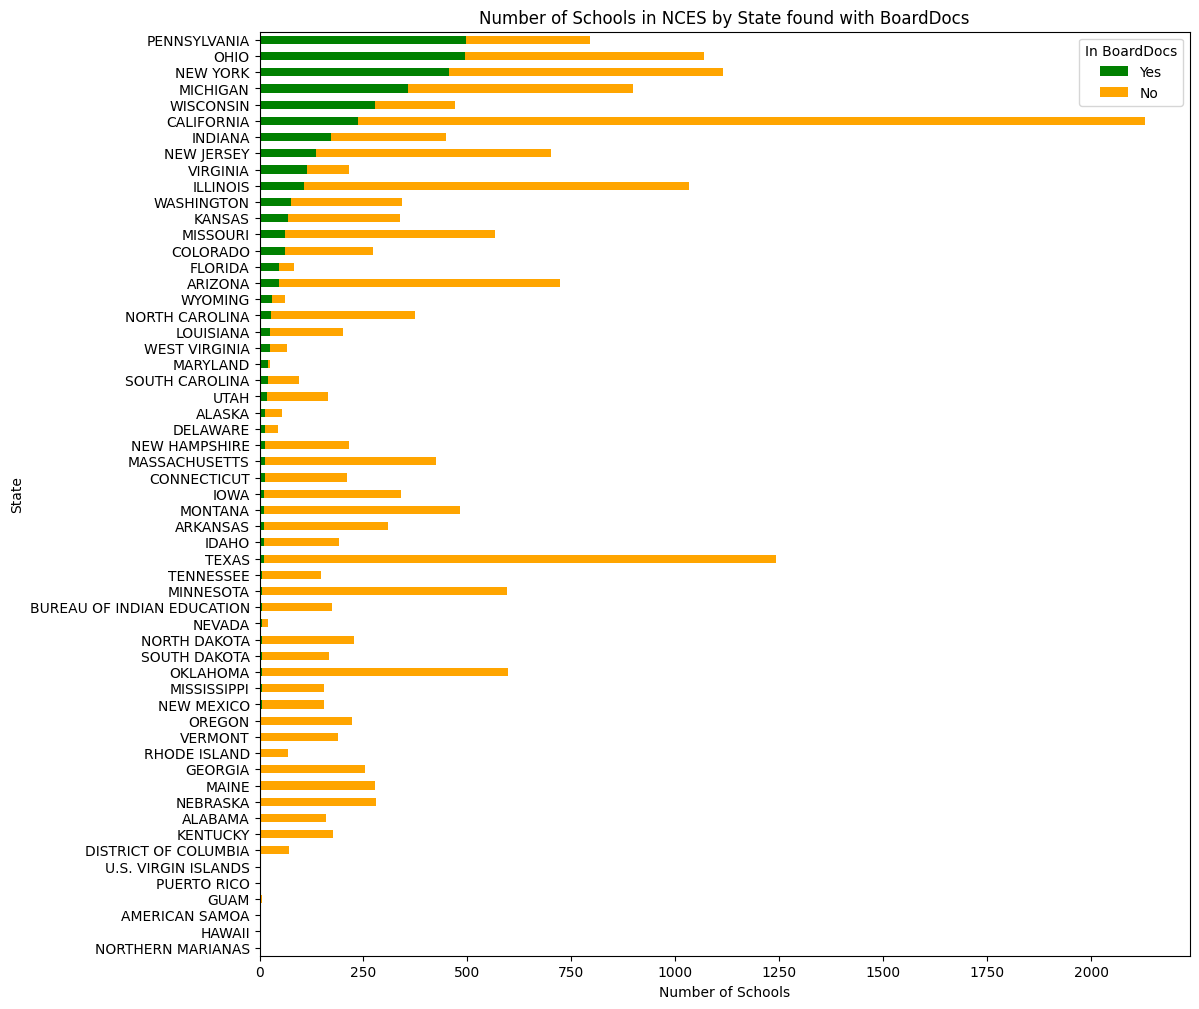

In [50]:
# Create a pivot table to count the number of schools by state and in_boarddocs status
nces_df["in_boarddocs_plot"] = ~nces_df["in_boarddocs"]
pivot_table = nces_df.pivot_table(index='STATENAME', columns='in_boarddocs_plot', aggfunc='size', fill_value=0)

# Sort the pivot table by the percentage of schools in BoardDocs
pivot_table = pivot_table.sort_values(by=False, ascending=True)

# Plot the 100% stacked horizontal bar chart
pivot_table.plot(kind='barh', stacked=True, figsize=(12, 12), color=['green', 'orange'])
plt.ylabel('State')
plt.xlabel('Number of Schools')
plt.title('Number of Schools in NCES by State found with BoardDocs')
plt.legend(title='In BoardDocs', labels=['Yes', 'No'])
plt.show()